In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(15, 5)})
plt.style.use("fivethirtyeight")

In [3]:
d_parser = lambda x: pd.datetime.strptime(x, "%d.%m.%Y")
bikes_df = pd.read_csv(
    "bikes.csv", delimiter=";", index_col=0, parse_dates=["date"], date_parser=d_parser
)


## 1. Posortuj dane po dacie

In [4]:
bikes_df.sort_values(by=["date"], inplace=True, ascending=True)

## 2. Stwórz nowe kolumny:
- Dzień tygodnia
- Miesiąc
- Pora roku
- Kwartał
- Niedziele handlowe

In [5]:
bikes_df["day_of_week"] = bikes_df["date"].dt.day_name()
bikes_df["month"] = bikes_df["date"].dt.month_name()
seasons = np.array(["Winter", "Spring", "Summer", "Fall", "Winter"])
filt = np.searchsorted([80, 172, 264, 355], bikes_df["date"].dt.dayofyear)
bikes_df["season"] = seasons[filt]
bikes_df["quarter"] = bikes_df["date"].dt.quarter

In [6]:
SHOPPING_SUNDAYS = (
    ("2019-01-27"),
    ("2019-02-24"),
    ("2019-03-31"),
    ("2019-04-14"),
    ("2019-04-28"),
    ("2019-05-26"),
    ("2019-06-30"),
    ("2019-07-28"),
    ("2019-08-25"),
    ("2019-09-29"),
    ("2019-10-27"),
    ("2019-11-24"),
    ("2019-12-15"),
    ("2019-12-22"),
    ("2019-12-29"),
)

SHOPPING_SUNDAYS = pd.to_datetime(SHOPPING_SUNDAYS)
bikes_df["shopping_sunday"] = [
    "True" if x in SHOPPING_SUNDAYS else "False" for x in bikes_df["date"]
]


## 3. Oblicz średnią sprzedaż rowerów na dzień tygodnia, porę roku, miesiąc i przedstaw te wartości w formie graficznej.

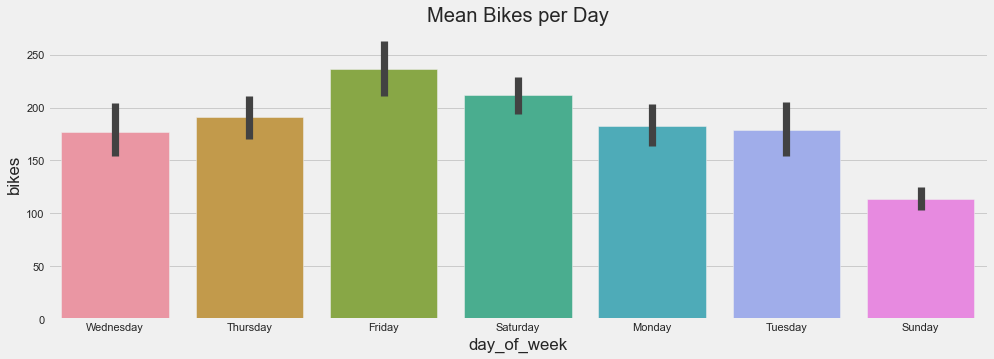

In [7]:
sns.barplot(data=bikes_df, x="day_of_week", y="bikes").set_title("Mean Bikes per Day");

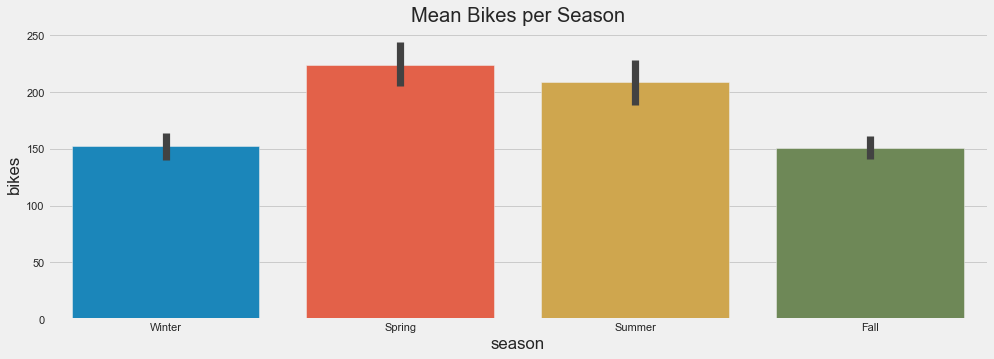

In [8]:
sns.barplot(data=bikes_df, x="season", y="bikes").set_title("Mean Bikes per Season");

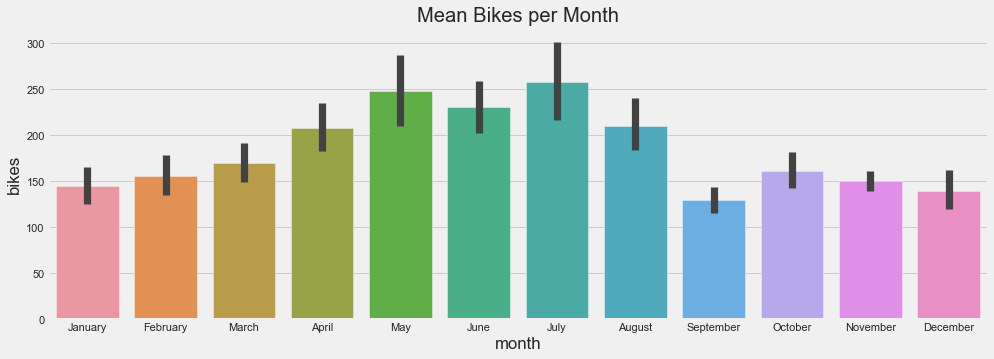

In [9]:
sns.barplot(data=bikes_df, x="month", y="bikes").set_title("Mean Bikes per Month");

## 4. Utwórz histogram sprzedaży rowerów zależny od dnia tygodnia i zinterpretuj uzyskane wyniki.

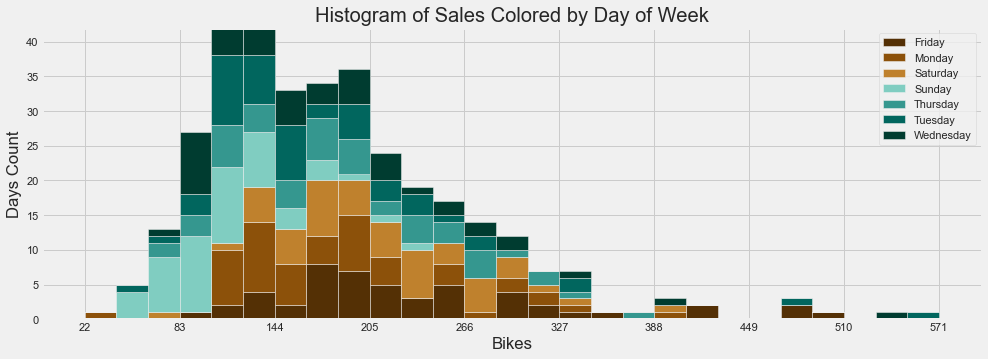

In [10]:
# prepare the data for plotting
bikes_per_day = bikes_df[["bikes", "day_of_week"]].groupby("day_of_week")
lx = []
ln = []

colors = ["#543005", "#8c510a", "#bf812d", "#80cdc1", "#35978f", "#01665e", "#003c30"]

# iterate over every groupby group and append their values as a list
for _, df_ in bikes_per_day:
    lx.append(df_["bikes"].values.tolist())
    ln.append(list(set(df_["day_of_week"].values.tolist()))[0])

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

n, bins, patches = ax.hist(lx, bins=27, stacked=True, color=colors)

ax.set_ylim(0, 42)
ax.set_xticks(bins[::3])  # set the xticks to reflect every third value
ax.set_title("Histogram of Sales Colored by Day of Week")
ax.legend({class_: color for class_, color in zip(ln, colors)})
ax.set_ylabel("Days Count")
ax.set_xlabel("Bikes");


From this histogram we can observe that when Days Count fall between 30 and 40, then we are probably dealing with regular weekday rents (e.g. daily trip to work).

It's also possible to see a trend of renting more bikes during weekends on less regular basis.

## 6. Jakie inne zmienne mogłyby pomóc w prognozowaniu sprzedaży rowerów?

In [11]:
bikes_df["year"] = bikes_df["date"].dt.year
bikes_df["day"] = bikes_df["date"].dt.day
bikes_df["week_of_year"] = bikes_df["date"].dt.weekofyear
bikes_df["day_of_year"] = bikes_df["date"].dt.dayofyear
bikes_df["weekend"] = bikes_df["day_of_week"].map(lambda s: str(s in ["Saturday", "Sunday"]))
bikes_df["working_day"] = bikes_df["day_of_week"].map(lambda s: str(s not in ["Saturday", "Sunday"]))

## 5. Stwórz wykres szeregu czasowego i zaznacz osobnym kolorem 5 dni z największą liczbą sprzedaży.


In [12]:
bikes_df.set_index("date", inplace=True)

time_series = bikes_df["bikes"].resample("D").mean()
top5_sales_days = time_series.nlargest(n=5, keep="first")

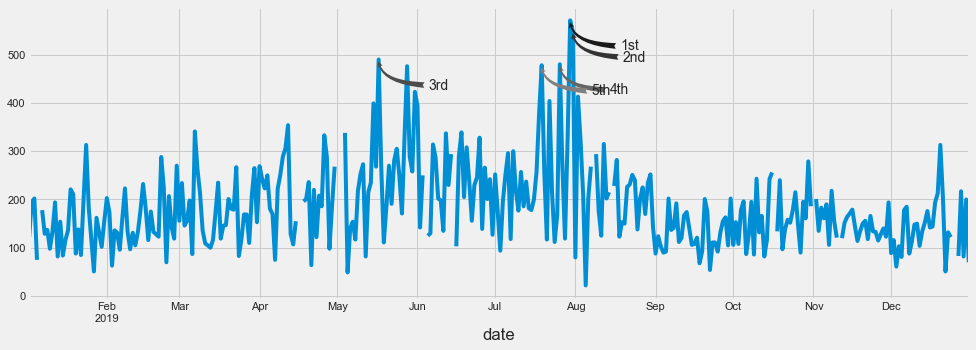

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
time_series.plot(ax=ax)

ax.annotate(
    "1st",
    xy=("2019-07-30", 571),
    xycoords="data",
    xytext=(50, -30),
    textcoords="offset points",
    arrowprops=dict(
        arrowstyle="fancy",
        fc=".1",
        ec="none",
        connectionstyle="angle3,angleA=0,angleB=-90",
    ),
)

ax.annotate(
    "2nd",
    xy=("2019-07-31", 548),
    xycoords="data",
    xytext=(50, -30),
    textcoords="offset points",
    arrowprops=dict(
        arrowstyle="fancy",
        fc=".2",
        ec="none",
        connectionstyle="angle3,angleA=0,angleB=-90",
    ),
)

ax.annotate(
    "3rd",
    xy=("2019-05-17", 490),
    xycoords="data",
    xytext=(50, -30),
    textcoords="offset points",
    arrowprops=dict(
        arrowstyle="fancy",
        fc=".3",
        ec="none",
        connectionstyle="angle3,angleA=0,angleB=-90",
    ),
)

ax.annotate(
    "4th",
    xy=("2019-07-26", 480),
    xycoords="data",
    xytext=(50, -30),
    textcoords="offset points",
    arrowprops=dict(
        arrowstyle="fancy",
        fc=".4",
        ec="none",
        connectionstyle="angle3,angleA=0,angleB=-90",
    ),
)

ax.annotate(
    "5th",
    xy=("2019-07-19", 478),
    xycoords="data",
    xytext=(50, -30),
    textcoords="offset points",
    arrowprops=dict(
        arrowstyle="fancy",
        fc=".5",
        ec="none",
        connectionstyle="angle3,angleA=0,angleB=-90",
    ),
);
